## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.6ms	remaining: 52.5s
1:	learn: 0.9301086	total: 61.2ms	remaining: 30.5s
2:	learn: 0.9005637	total: 67.2ms	remaining: 22.3s
3:	learn: 0.8720983	total: 70.8ms	remaining: 17.6s
4:	learn: 0.8467410	total: 74ms	remaining: 14.7s
5:	learn: 0.8226672	total: 76.9ms	remaining: 12.7s
6:	learn: 0.7994702	total: 79.8ms	remaining: 11.3s
7:	learn: 0.7784272	total: 82.9ms	remaining: 10.3s
8:	learn: 0.7602192	total: 85.7ms	remaining: 9.43s
9:	learn: 0.7412421	total: 88.6ms	remaining: 8.77s
10:	learn: 0.7247930	total: 91.5ms	remaining: 8.22s
11:	learn: 0.7089951	total: 94.1ms	remaining: 7.75s
12:	learn: 0.6951345	total: 96.8ms	remaining: 7.35s
13:	learn: 0.6809276	total: 99.7ms	remaining: 7.02s
14:	learn: 0.6692630	total: 103ms	remaining: 6.75s
15:	learn: 0.6588323	total: 106ms	remaining: 6.55s
16:	learn: 0.6472700	total: 109ms	remaining: 6.32s
17:	learn: 0.6379982	total: 112ms	remaining: 6.12s
18:	learn: 0.6294674	total: 115ms	remaining: 5.94s

29:	learn: 0.5571384	total: 184ms	remaining: 5.96s
30:	learn: 0.5536829	total: 187ms	remaining: 5.86s
31:	learn: 0.5505614	total: 190ms	remaining: 5.76s
32:	learn: 0.5475131	total: 193ms	remaining: 5.66s
33:	learn: 0.5445860	total: 196ms	remaining: 5.58s
34:	learn: 0.5398906	total: 199ms	remaining: 5.49s
35:	learn: 0.5363592	total: 202ms	remaining: 5.41s
36:	learn: 0.5337228	total: 205ms	remaining: 5.33s
37:	learn: 0.5296892	total: 208ms	remaining: 5.25s
38:	learn: 0.5255485	total: 210ms	remaining: 5.18s
39:	learn: 0.5217941	total: 213ms	remaining: 5.12s
40:	learn: 0.5196440	total: 216ms	remaining: 5.05s
41:	learn: 0.5170220	total: 219ms	remaining: 4.99s
42:	learn: 0.5141148	total: 222ms	remaining: 4.93s
43:	learn: 0.5116444	total: 224ms	remaining: 4.88s
44:	learn: 0.5100547	total: 227ms	remaining: 4.82s
45:	learn: 0.5069096	total: 230ms	remaining: 4.77s
46:	learn: 0.5051685	total: 233ms	remaining: 4.72s
47:	learn: 0.5033968	total: 236ms	remaining: 4.67s
48:	learn: 0.5012433	total: 238

86:	learn: 0.4583577	total: 376ms	remaining: 3.94s
87:	learn: 0.4577999	total: 378ms	remaining: 3.92s
88:	learn: 0.4572657	total: 381ms	remaining: 3.9s
89:	learn: 0.4569360	total: 384ms	remaining: 3.88s
90:	learn: 0.4559969	total: 387ms	remaining: 3.87s
91:	learn: 0.4549716	total: 390ms	remaining: 3.85s
92:	learn: 0.4544919	total: 393ms	remaining: 3.83s
93:	learn: 0.4537693	total: 396ms	remaining: 3.81s
94:	learn: 0.4532673	total: 399ms	remaining: 3.8s
95:	learn: 0.4526987	total: 401ms	remaining: 3.78s
96:	learn: 0.4520952	total: 404ms	remaining: 3.76s
97:	learn: 0.4513919	total: 407ms	remaining: 3.75s
98:	learn: 0.4503747	total: 410ms	remaining: 3.73s
99:	learn: 0.4494783	total: 413ms	remaining: 3.72s
100:	learn: 0.4487329	total: 416ms	remaining: 3.7s
101:	learn: 0.4481325	total: 419ms	remaining: 3.69s
102:	learn: 0.4475445	total: 422ms	remaining: 3.67s
103:	learn: 0.4466014	total: 424ms	remaining: 3.65s
104:	learn: 0.4461730	total: 427ms	remaining: 3.64s
105:	learn: 0.4457259	total: 

153:	learn: 0.4233079	total: 570ms	remaining: 3.13s
154:	learn: 0.4228876	total: 573ms	remaining: 3.12s
155:	learn: 0.4225404	total: 575ms	remaining: 3.11s
156:	learn: 0.4222831	total: 578ms	remaining: 3.1s
157:	learn: 0.4218088	total: 581ms	remaining: 3.09s
158:	learn: 0.4213239	total: 583ms	remaining: 3.08s
159:	learn: 0.4210022	total: 587ms	remaining: 3.08s
160:	learn: 0.4201256	total: 589ms	remaining: 3.07s
161:	learn: 0.4197073	total: 592ms	remaining: 3.06s
162:	learn: 0.4192052	total: 595ms	remaining: 3.06s
163:	learn: 0.4187949	total: 598ms	remaining: 3.05s
164:	learn: 0.4184572	total: 601ms	remaining: 3.04s
165:	learn: 0.4180680	total: 604ms	remaining: 3.04s
166:	learn: 0.4176884	total: 607ms	remaining: 3.03s
167:	learn: 0.4173026	total: 610ms	remaining: 3.02s
168:	learn: 0.4170486	total: 613ms	remaining: 3.02s
169:	learn: 0.4165960	total: 616ms	remaining: 3.01s
170:	learn: 0.4161870	total: 620ms	remaining: 3s
171:	learn: 0.4156228	total: 622ms	remaining: 3s
172:	learn: 0.41530

214:	learn: 0.4002274	total: 756ms	remaining: 2.76s
215:	learn: 0.3998919	total: 759ms	remaining: 2.75s
216:	learn: 0.3994781	total: 762ms	remaining: 2.75s
217:	learn: 0.3992639	total: 765ms	remaining: 2.74s
218:	learn: 0.3989428	total: 768ms	remaining: 2.74s
219:	learn: 0.3986243	total: 772ms	remaining: 2.73s
220:	learn: 0.3982897	total: 775ms	remaining: 2.73s
221:	learn: 0.3981001	total: 777ms	remaining: 2.72s
222:	learn: 0.3978579	total: 780ms	remaining: 2.72s
223:	learn: 0.3976462	total: 783ms	remaining: 2.71s
224:	learn: 0.3973704	total: 786ms	remaining: 2.71s
225:	learn: 0.3971729	total: 788ms	remaining: 2.7s
226:	learn: 0.3968841	total: 791ms	remaining: 2.69s
227:	learn: 0.3965787	total: 794ms	remaining: 2.69s
228:	learn: 0.3963073	total: 797ms	remaining: 2.68s
229:	learn: 0.3960925	total: 800ms	remaining: 2.68s
230:	learn: 0.3957018	total: 803ms	remaining: 2.67s
231:	learn: 0.3954162	total: 806ms	remaining: 2.67s
232:	learn: 0.3951665	total: 809ms	remaining: 2.66s
233:	learn: 0

279:	learn: 0.3840246	total: 949ms	remaining: 2.44s
280:	learn: 0.3839018	total: 951ms	remaining: 2.43s
281:	learn: 0.3836780	total: 954ms	remaining: 2.43s
282:	learn: 0.3832767	total: 957ms	remaining: 2.42s
283:	learn: 0.3831676	total: 960ms	remaining: 2.42s
284:	learn: 0.3830010	total: 962ms	remaining: 2.41s
285:	learn: 0.3826742	total: 965ms	remaining: 2.41s
286:	learn: 0.3824534	total: 968ms	remaining: 2.4s
287:	learn: 0.3821767	total: 973ms	remaining: 2.4s
288:	learn: 0.3819748	total: 976ms	remaining: 2.4s
289:	learn: 0.3817667	total: 978ms	remaining: 2.4s
290:	learn: 0.3815253	total: 981ms	remaining: 2.39s
291:	learn: 0.3813529	total: 984ms	remaining: 2.38s
292:	learn: 0.3812172	total: 987ms	remaining: 2.38s
293:	learn: 0.3809978	total: 989ms	remaining: 2.38s
294:	learn: 0.3807825	total: 992ms	remaining: 2.37s
295:	learn: 0.3805940	total: 995ms	remaining: 2.37s
296:	learn: 0.3801959	total: 998ms	remaining: 2.36s
297:	learn: 0.3799439	total: 1s	remaining: 2.36s
298:	learn: 0.37972

347:	learn: 0.3705958	total: 1.14s	remaining: 2.13s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.13s
349:	learn: 0.3701923	total: 1.15s	remaining: 2.13s
350:	learn: 0.3700067	total: 1.15s	remaining: 2.12s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.12s
352:	learn: 0.3697314	total: 1.16s	remaining: 2.12s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.12s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.11s
355:	learn: 0.3692589	total: 1.17s	remaining: 2.11s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.1s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.1s
358:	learn: 0.3687886	total: 1.18s	remaining: 2.1s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.09s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.09s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.09s
362:	learn: 0.3682710	total: 1.19s	remaining: 2.08s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.08s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.07s
365:	learn: 0.3677932	total: 1.2s	remaining: 2.07s
366:	learn: 0.36

409:	learn: 0.3608193	total: 1.33s	remaining: 1.92s
410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.34s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.87s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.37s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.86s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3579182	total: 1.38s	remaining: 1.85s
428:	learn: 0.3

471:	learn: 0.3518082	total: 1.52s	remaining: 1.7s
472:	learn: 0.3516593	total: 1.53s	remaining: 1.7s
473:	learn: 0.3514906	total: 1.53s	remaining: 1.7s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.69s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.55s	remaining: 1.68s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.67s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.57s	remaining: 1.66s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.65s
487:	learn: 0.3494609	total: 1.57s	remaining: 1.65s
488:	learn: 0.3493200	total: 1.58s	remaining: 1.65s
489:	learn: 0.3491550	total: 1.58s	remaining: 1.64s
490:	learn: 0.3

534:	learn: 0.3433236	total: 1.72s	remaining: 1.49s
535:	learn: 0.3432219	total: 1.72s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.72s	remaining: 1.48s
537:	learn: 0.3430198	total: 1.72s	remaining: 1.48s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.73s	remaining: 1.47s
540:	learn: 0.3426641	total: 1.73s	remaining: 1.47s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.74s	remaining: 1.46s
543:	learn: 0.3423997	total: 1.74s	remaining: 1.46s
544:	learn: 0.3422315	total: 1.74s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.45s
546:	learn: 0.3419673	total: 1.75s	remaining: 1.45s
547:	learn: 0.3418121	total: 1.75s	remaining: 1.45s
548:	learn: 0.3416228	total: 1.75s	remaining: 1.44s
549:	learn: 0.3414331	total: 1.76s	remaining: 1.44s
550:	learn: 0.3413090	total: 1.76s	remaining: 1.44s
551:	learn: 0.3411591	total: 1.76s	remaining: 1.43s
552:	learn: 0.3410901	total: 1.77s	remaining: 1.43s
553:	learn: 

598:	learn: 0.3364801	total: 1.91s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.91s	remaining: 1.27s
600:	learn: 0.3363054	total: 1.91s	remaining: 1.27s
601:	learn: 0.3361892	total: 1.92s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.92s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.92s	remaining: 1.26s
604:	learn: 0.3359096	total: 1.93s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.93s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.93s	remaining: 1.25s
607:	learn: 0.3355448	total: 1.93s	remaining: 1.25s
608:	learn: 0.3354512	total: 1.94s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.94s	remaining: 1.24s
610:	learn: 0.3352669	total: 1.94s	remaining: 1.24s
611:	learn: 0.3351716	total: 1.95s	remaining: 1.23s
612:	learn: 0.3351155	total: 1.95s	remaining: 1.23s
613:	learn: 0.3350041	total: 1.95s	remaining: 1.23s
614:	learn: 0.3349098	total: 1.95s	remaining: 1.22s
615:	learn: 0.3348304	total: 1.96s	remaining: 1.22s
616:	learn: 0.3347009	total: 1.96s	remaining: 1.22s
617:	learn: 

662:	learn: 0.3299184	total: 2.1s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.1s	remaining: 1.06s
664:	learn: 0.3296970	total: 2.11s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.11s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.11s	remaining: 1.05s
667:	learn: 0.3295390	total: 2.12s	remaining: 1.05s
668:	learn: 0.3294195	total: 2.12s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.12s	remaining: 1.04s
670:	learn: 0.3292086	total: 2.12s	remaining: 1.04s
671:	learn: 0.3289913	total: 2.13s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.13s	remaining: 1.03s
673:	learn: 0.3288145	total: 2.13s	remaining: 1.03s
674:	learn: 0.3286969	total: 2.13s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.14s	remaining: 1.02s
676:	learn: 0.3285218	total: 2.14s	remaining: 1.02s
677:	learn: 0.3284620	total: 2.14s	remaining: 1.02s
678:	learn: 0.3283999	total: 2.15s	remaining: 1.01s
679:	learn: 0.3283506	total: 2.15s	remaining: 1.01s
680:	learn: 0.3282208	total: 2.15s	remaining: 1.01s
681:	learn: 0.

723:	learn: 0.3243835	total: 2.29s	remaining: 875ms
724:	learn: 0.3242957	total: 2.3s	remaining: 871ms
725:	learn: 0.3242628	total: 2.3s	remaining: 868ms
726:	learn: 0.3242076	total: 2.3s	remaining: 865ms
727:	learn: 0.3240923	total: 2.31s	remaining: 861ms
728:	learn: 0.3240148	total: 2.31s	remaining: 858ms
729:	learn: 0.3239014	total: 2.31s	remaining: 855ms
730:	learn: 0.3237918	total: 2.31s	remaining: 851ms
731:	learn: 0.3236654	total: 2.32s	remaining: 848ms
732:	learn: 0.3235938	total: 2.32s	remaining: 845ms
733:	learn: 0.3235120	total: 2.32s	remaining: 841ms
734:	learn: 0.3234421	total: 2.32s	remaining: 838ms
735:	learn: 0.3233367	total: 2.33s	remaining: 836ms
736:	learn: 0.3232438	total: 2.33s	remaining: 833ms
737:	learn: 0.3231289	total: 2.34s	remaining: 830ms
738:	learn: 0.3230697	total: 2.34s	remaining: 826ms
739:	learn: 0.3229734	total: 2.34s	remaining: 823ms
740:	learn: 0.3228697	total: 2.34s	remaining: 820ms
741:	learn: 0.3227984	total: 2.35s	remaining: 816ms
742:	learn: 0.3

786:	learn: 0.3188016	total: 2.48s	remaining: 673ms
787:	learn: 0.3187670	total: 2.49s	remaining: 669ms
788:	learn: 0.3186601	total: 2.49s	remaining: 666ms
789:	learn: 0.3185886	total: 2.49s	remaining: 663ms
790:	learn: 0.3185418	total: 2.5s	remaining: 660ms
791:	learn: 0.3184514	total: 2.5s	remaining: 656ms
792:	learn: 0.3183529	total: 2.5s	remaining: 653ms
793:	learn: 0.3182569	total: 2.5s	remaining: 650ms
794:	learn: 0.3181932	total: 2.51s	remaining: 647ms
795:	learn: 0.3180848	total: 2.51s	remaining: 644ms
796:	learn: 0.3180327	total: 2.51s	remaining: 640ms
797:	learn: 0.3179305	total: 2.52s	remaining: 637ms
798:	learn: 0.3178456	total: 2.52s	remaining: 634ms
799:	learn: 0.3177655	total: 2.52s	remaining: 631ms
800:	learn: 0.3176826	total: 2.52s	remaining: 627ms
801:	learn: 0.3176217	total: 2.53s	remaining: 624ms
802:	learn: 0.3174842	total: 2.53s	remaining: 621ms
803:	learn: 0.3173800	total: 2.53s	remaining: 618ms
804:	learn: 0.3172892	total: 2.54s	remaining: 614ms
805:	learn: 0.31

854:	learn: 0.3134711	total: 2.68s	remaining: 454ms
855:	learn: 0.3134242	total: 2.68s	remaining: 451ms
856:	learn: 0.3133249	total: 2.68s	remaining: 448ms
857:	learn: 0.3132311	total: 2.69s	remaining: 444ms
858:	learn: 0.3131446	total: 2.69s	remaining: 441ms
859:	learn: 0.3130587	total: 2.69s	remaining: 438ms
860:	learn: 0.3129229	total: 2.69s	remaining: 435ms
861:	learn: 0.3128651	total: 2.7s	remaining: 432ms
862:	learn: 0.3127812	total: 2.7s	remaining: 429ms
863:	learn: 0.3126884	total: 2.7s	remaining: 426ms
864:	learn: 0.3126358	total: 2.71s	remaining: 422ms
865:	learn: 0.3125933	total: 2.71s	remaining: 419ms
866:	learn: 0.3125160	total: 2.71s	remaining: 416ms
867:	learn: 0.3124401	total: 2.71s	remaining: 413ms
868:	learn: 0.3123064	total: 2.72s	remaining: 410ms
869:	learn: 0.3122328	total: 2.72s	remaining: 406ms
870:	learn: 0.3121623	total: 2.72s	remaining: 403ms
871:	learn: 0.3121072	total: 2.73s	remaining: 400ms
872:	learn: 0.3120356	total: 2.73s	remaining: 397ms
873:	learn: 0.3

916:	learn: 0.3089417	total: 2.87s	remaining: 259ms
917:	learn: 0.3088562	total: 2.87s	remaining: 256ms
918:	learn: 0.3087578	total: 2.87s	remaining: 253ms
919:	learn: 0.3086793	total: 2.88s	remaining: 250ms
920:	learn: 0.3086255	total: 2.88s	remaining: 247ms
921:	learn: 0.3085073	total: 2.88s	remaining: 244ms
922:	learn: 0.3084388	total: 2.88s	remaining: 241ms
923:	learn: 0.3083752	total: 2.89s	remaining: 238ms
924:	learn: 0.3082889	total: 2.89s	remaining: 234ms
925:	learn: 0.3081901	total: 2.89s	remaining: 231ms
926:	learn: 0.3081106	total: 2.9s	remaining: 228ms
927:	learn: 0.3080422	total: 2.9s	remaining: 225ms
928:	learn: 0.3079770	total: 2.9s	remaining: 222ms
929:	learn: 0.3079316	total: 2.91s	remaining: 219ms
930:	learn: 0.3078660	total: 2.91s	remaining: 216ms
931:	learn: 0.3078147	total: 2.91s	remaining: 213ms
932:	learn: 0.3077165	total: 2.92s	remaining: 209ms
933:	learn: 0.3076207	total: 2.92s	remaining: 206ms
934:	learn: 0.3075333	total: 2.92s	remaining: 203ms
935:	learn: 0.3

980:	learn: 0.3042142	total: 3.06s	remaining: 59.3ms
981:	learn: 0.3041509	total: 3.06s	remaining: 56.1ms
982:	learn: 0.3041077	total: 3.06s	remaining: 53ms
983:	learn: 0.3040665	total: 3.07s	remaining: 49.9ms
984:	learn: 0.3040237	total: 3.07s	remaining: 46.8ms
985:	learn: 0.3039532	total: 3.07s	remaining: 43.6ms
986:	learn: 0.3038723	total: 3.08s	remaining: 40.5ms
987:	learn: 0.3038141	total: 3.08s	remaining: 37.4ms
988:	learn: 0.3037455	total: 3.08s	remaining: 34.3ms
989:	learn: 0.3036820	total: 3.08s	remaining: 31.2ms
990:	learn: 0.3036165	total: 3.09s	remaining: 28ms
991:	learn: 0.3035759	total: 3.09s	remaining: 24.9ms
992:	learn: 0.3035124	total: 3.09s	remaining: 21.8ms
993:	learn: 0.3034295	total: 3.1s	remaining: 18.7ms
994:	learn: 0.3033612	total: 3.1s	remaining: 15.6ms
995:	learn: 0.3033209	total: 3.1s	remaining: 12.5ms
996:	learn: 0.3032659	total: 3.1s	remaining: 9.34ms
997:	learn: 0.3032189	total: 3.11s	remaining: 6.23ms
998:	learn: 0.3031594	total: 3.11s	remaining: 3.11ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.032915207940499


#### Sanity Checks 

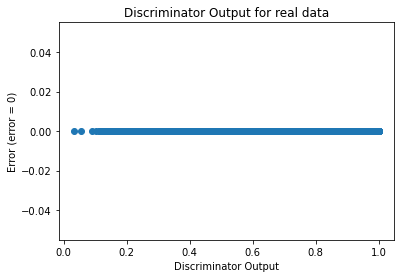

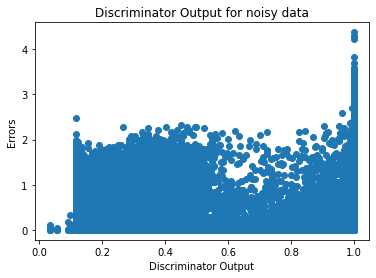

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)